# Baseline 1
Given:  
model data of 34 species + ODE system with 1 unknown parameter h_10_TPplus

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import tensorflow as tf

import models

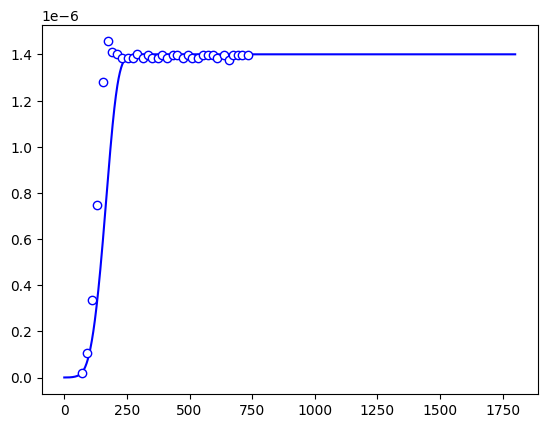

In [2]:
data = sio.loadmat("./data/data_case_1.mat")
t_test = data["t"]
u_test = data["Y"] # scaling?

#name_list = ['TF','VII', 'TF:VII', 'VIIa', 'TF:VIIa', 'IX', 'IXa', 'IXm', 'IXam',
#'X', 'Xa', 'Xm', 'Xam', 'II', 'IIa', 'IIm', 'IIam', 'PL', 'AP', 'VIII', 'VIIIa', 'VIIIm',
#'VIIIam', 'VIIIam:IXam', 'V', 'Va', 'Vm', 'Vam', 'Xam:Vam', 'I', 'Ia', 'TFPI', 'Xa:TFPI', 'ATIII']

TIM = 1800
NDM = [0.025, 10.0, 0.005, 10.0, 0.005, 90.0, 90.0, 10.0, 10.0, 170.0,
       170.0, 10.0, 10.0, 1400.0, 1400.0, 10.0, 10.0, 10.0, 10.0,
       0.7, 0.7, 0.7, 0.7, 0.7, 20.0, 20.0, 10.0, 10.0, 10.0, 7000.0,
       7000.0, 2.5, 2.5, 3400.0] #nM

exp_data_1 = np.loadtxt("./data/exp_data_case_1.dat").T
t_exp_1 = exp_data_1[0]
u_exp_1 = exp_data_1[1]

plt.plot(t_test * TIM, (u_test[:, 14] * NDM[14] + u_test[:, 16] * NDM[16]) * 1e-9, 'b', label='Model(No Inh)')
plt.plot(t_exp_1, u_exp_1, 'bo', markerfacecolor='w', label='Exp')
plt.show()

In [3]:
t_train = t_test[::20]
u_train = u_test[::20]
f_train = np.zeros_like(u_train)

model = models.PINN(eps=1e-5)

In [4]:
loss = model.train(t_train, f_train, t_train, u_train, niter=200000)
# print total loss, data loss, ode loss, eq10_loss,eq31_loss, eq32_loss

0 533.1154 533.1154 0.37429228 0.3724718 6.383874e-05 0.0017566434
1000 199.27129 199.27127 1.514642 1.5146124 7.84123e-06 2.1673895e-05
2000 102.133804 102.13379 1.2883797 1.2879978 0.0002645131 0.0001172555
3000 14.913403 14.913385 1.7366747 1.5484958 0.14528808 0.04289074
4000 4.28129 4.281271 1.9249492 1.7212847 0.034429416 0.16923498
5000 2.806251 2.8062356 1.5464082 1.4017273 0.07161127 0.07306957
6000 1.8402047 1.8401828 2.198779 1.916336 0.052352555 0.23009047
7000 1.2053912 1.2053747 1.644342 1.5515273 0.028722165 0.06409253
8000 0.7686928 0.76867574 1.7035635 1.530285 0.11290808 0.060370307
9000 0.5158456 0.51582307 2.2505581 2.1437051 0.026063485 0.080789566
10000 0.33502075 0.33499748 2.327395 2.260136 0.012994295 0.05426488
11000 0.19620231 0.19618446 1.7845038 1.7493432 0.00786598 0.02729459
12000 0.098261006 0.09823542 2.5586014 2.52141 0.009815025 0.027376441
13000 0.044701204 0.044672374 2.8831334 2.8762777 0.0019298104 0.0049258964
14000 0.021618752 0.02159493 2.38214

96000 0.00015265173 0.00012832861 2.4323115 2.4321659 8.558366e-05 6.007948e-05
97000 0.00029554171 0.00027506182 2.0479915 2.0476198 0.00030768482 6.384657e-05
98000 0.00015249781 0.0001296489 2.284891 2.2847564 7.822229e-05 5.6164605e-05
99000 0.00017024475 0.00014600356 2.4241188 2.4239821 8.057982e-05 5.594564e-05
100000 0.00015054525 0.00012651323 2.4032023 2.4030755 7.698478e-05 4.9796927e-05
101000 0.00015695895 0.0001348805 2.2078452 2.2074997 0.0002943555 5.1090603e-05
102000 0.00017734116 0.00015451295 2.2828221 2.282593 6.486779e-05 0.00016418974
103000 0.00025767804 0.0002396969 1.7981144 1.7979522 0.00011845069 4.369722e-05
104000 0.00015173097 0.00012759361 2.4137363 2.4133708 0.00032447305 4.106925e-05
105000 0.00017792112 0.00015810844 1.9812677 1.9811854 4.434343e-05 3.788143e-05
106000 0.00015111163 0.00012540666 2.5704978 2.570332 6.420774e-05 0.00010152134
107000 0.00015526751 0.00013497178 2.0295737 2.029472 6.310506e-05 3.8434784e-05
108000 0.00015116305 0.0001272

197000 0.00014581077 0.00012035942 2.5451357 2.5450804 4.4225264e-05 1.1163043e-05
198000 0.00020027874 0.00018218871 1.8090028 1.8088737 5.375698e-05 7.535997e-05
199000 0.00014639227 0.00012228065 2.4111626 2.4111185 3.1995933e-05 1.2118694e-05
min total loss:  0.00014532337


In [5]:
model.restore()
u_pred = model.call(tf.constant(t_test, tf.float32)).numpy()

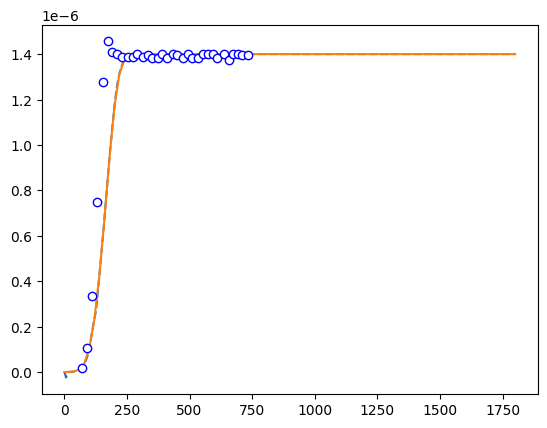

In [6]:
# plt.plot(t_test * TIM, (u_test[:, 14] * NDM[14] + u_test[:, 16] * NDM[16]) * 1e-9, 'b', label='Model(No Inh)')
plt.plot(t_test * TIM, (u_pred[:, 14] * NDM[14] + u_pred[:, 16] * NDM[16]) * 1e-9, '--', label='Model(No Inh)')
plt.plot(t_train * TIM, (u_train[:, 14] * NDM[14] + u_train[:, 16] * NDM[16]) * 1e-9, label='Model(No Inh)')
plt.plot(t_exp_1, u_exp_1, 'bo', markerfacecolor='w', label='Exp')
plt.show()

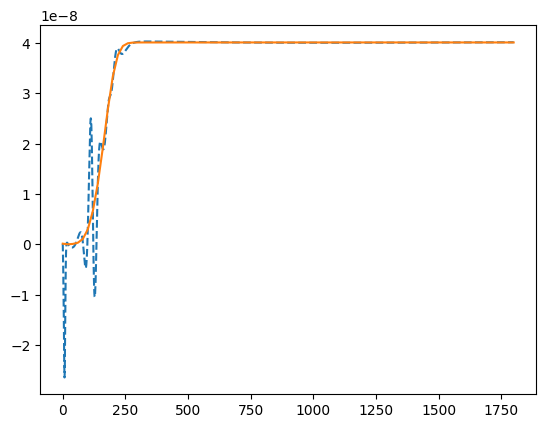

In [7]:
plt.plot(t_test * TIM, u_pred[:, 14] * NDM[14] * 1e-9, '--')
plt.plot(t_train * TIM, u_train[:, 14] * NDM[14] * 1e-9)
plt.show()

In [8]:
# u_pred[:, 14][:400] * NDM[14] * 1e-9

In [9]:
# u_train[:, 14][:20] * NDM[14] * 1e-9

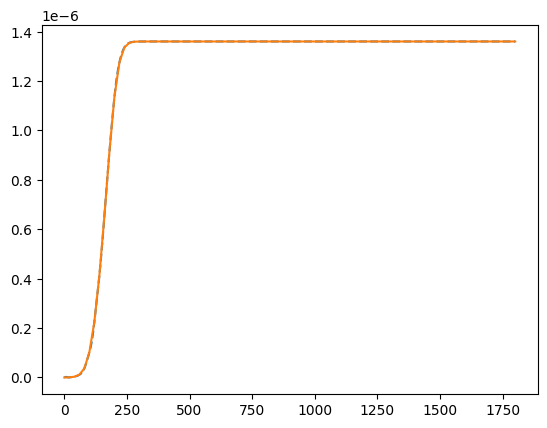

In [10]:
plt.plot(t_test * TIM, u_pred[:, 16] * NDM[16] * 1e-9, '--')
plt.plot(t_train * TIM, u_train[:, 16] * NDM[16] * 1e-9)
plt.show()

In [11]:
# h_10_TPplus = 4.381
# h_10_TPminus = 5.293 * 1e-8
# h_2 = 1.79 * 1e-4
print("h_10_TPplus:", model.h_10_TPplus.numpy())
print("h_10_TPminus:", model.h_10_TPminus.numpy())
print("h_2:", model.h_2.numpy())

h_10_TPplus: -0.041715883
h_10_TPminus: 0.0
h_2: 0.0
